# Model Training

### 1) Import packages and data

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv('final_train.csv')

In [3]:
df.head()

,Unnamed: 0,GameId,Team,X,Y,S,A,NflId,YardLine,Quarter,Down,Distance,FieldPosition,OffenseFormation,DefendersInTheBox,PlayDirection,Yards
0,0,2017090700,away,73.91,34.84,1.69,1.13,496723,35,1,3,2,NE,SHOTGUN,6.0,left,8
1,1,2017090700,away,74.67,32.64,0.42,1.35,2495116,35,1,3,2,NE,SHOTGUN,6.0,left,8
2,2,2017090700,away,74.00,33.20,1.22,0.59,2495493,35,1,3,2,NE,SHOTGUN,6.0,left,8
3,3,2017090700,away,71.46,27.70,0.42,0.54,2506353,35,1,3,2,NE,SHOTGUN,6.0,left,8
4,4,2017090700,away,69.32,35.42,1.82,2.43,2530794,35,1,3,2,NE,SHOTGUN,6.0,left,8


In [4]:
X = df.drop(columns=['Yards', 'Unnamed: 0'], axis = 1)

In [5]:
X.head

<bound method NDFrame.head of             GameId  Team      X      Y     S     A    NflId  YardLine  \
0       2017090700  away  73.91  34.84  1.69  1.13   496723        35   
1       2017090700  away  74.67  32.64  0.42  1.35  2495116        35   
2       2017090700  away  74.00  33.20  1.22  0.59  2495493        35   
3       2017090700  away  71.46  27.70  0.42  0.54  2506353        35   
4       2017090700  away  69.32  35.42  1.82  2.43  2530794        35   
...            ...   ...    ...    ...   ...   ...      ...       ...   
682149  2019112500  home  69.58  31.33  4.19  1.33  2556593        38   
682150  2019112500  home  72.16  25.09  1.01  1.40  2558199        38   
682151  2019112500  home  72.23  31.95  1.75  0.68  2558830        38   
682152  2019112500  home  72.08  26.74  0.70  1.59  2562391        38   
682153  2019112500  home  68.11  24.67  4.71  1.30  2562707        38   

        Quarter  Down  Distance FieldPosition OffenseFormation  \
0             1     3      

In [6]:
X.dtypes

GameId                 int64
Team                  object
X                    float64
Y                    float64
S                    float64
A                    float64
NflId                  int64
YardLine               int64
Quarter                int64
Down                   int64
Distance               int64
FieldPosition         object
OffenseFormation      object
DefendersInTheBox    float64
PlayDirection         object
dtype: object

In [7]:
print("Categories in 'Team' variable:     ",end=" " )
print(df['Team'].unique())

print("Categories in 'FieldPosition' variable:  ",end=" ")
print(df['FieldPosition'].unique())

print("Categories in 'OffenseFormation' variable:",end=" " )
print(df['OffenseFormation'].unique())

print("Categories in 'PlayDirection' variable:     ",end=" " )
print(df['PlayDirection'].unique())


Categories in 'Team' variable:      ['away' 'home']
Categories in 'FieldPosition' variable:   ['NE' 'KC' '0' 'BUF' 'NYJ' 'ATL' 'CHI' 'CIN' 'BLT' 'CLV' 'PIT' 'ARZ' 'DET'
 'JAX' 'HST' 'TEN' 'OAK' 'WAS' 'PHI' 'LA' 'IND' 'GB' 'SEA' 'CAR' 'SF'
 'DAL' 'NYG' 'NO' 'MIN' 'DEN' 'LAC' 'TB' 'MIA']
Categories in 'OffenseFormation' variable: ['SHOTGUN' 'SINGLEBACK' 'JUMBO' 'PISTOL' 'I_FORM' 'ACE' 'WILDCAT' '0'
 'EMPTY']
Categories in 'PlayDirection' variable:      ['left' 'right']


In [8]:
y = df['Yards']

In [9]:
y

0         8
1         8
2         8
3         8
4         8
         ..
682149    4
682150    4
682151    4
682152    4
682153    4
Name: Yards, Length: 682154, dtype: int64

In [10]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(682154, 57)

In [13]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((545723, 57), (136431, 57))

In [14]:
# creating an evaluation function to give all metrics after model training

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
   # "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6.3919
- Mean Absolute Error: 3.7733
- R2 Score: 0.0176
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.3957
- Mean Absolute Error: 3.7669
- R2 Score: 0.0180


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9827
- Mean Absolute Error: 0.0648
- R2 Score: 0.9768


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 5.2351
- Mean Absolute Error: 3.3225
- R2 Score: 0.3410
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3276
- Mean Absolute Error: 3.3581
- R2 Score: 0.3186


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 6.7183
- Mean Absolute Error: 4.6414
- R2 Score: -0.0853
----------

In [16]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Decision Tree,0.976816
2,XGBRegressor,0.318581
0,Linear Regression,0.017990
3,AdaBoost Regressor,-0.086537


In [17]:
# Linear Regression
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 1.80


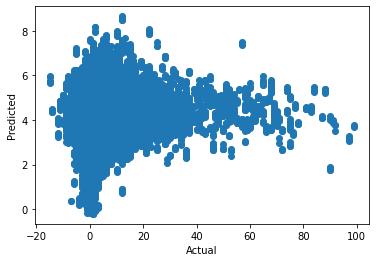

In [18]:
# Plot y_pred and y_test
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

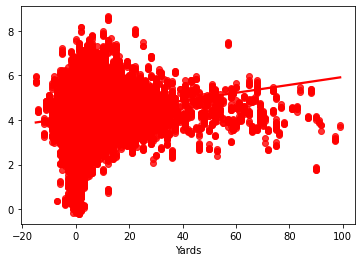

In [19]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [20]:
# Difference between actual and predicted values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
429781,5,4.762139,0.237861
635616,0,5.772639,-5.772639
646809,3,4.522516,-1.522516
664851,-2,5.124310,-7.124310
654667,3,4.486693,-1.486693
...,...,...,...
589470,3,3.796803,-0.796803
502920,4,4.818319,-0.818319
117042,1,3.995918,-2.995918
502187,1,4.554035,-3.554035


In [22]:
pred_df['Difference'].mean()

-0.01437260839613278